# Tracking FII flows

Plots the Foreign Institutional Investment flows in/out of Indian capital markets.
Follows the documentation [here](https://github.com/shyams80/plutons/blob/master/docs-R/InvestmentFlowsIndia.ipynb)

In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)
library(ggrepel)
library(lubridate)

options(repr.plot.width=16, repr.plot.height=8)

#initialize
iflows <- InvestmentFlowsIndia()

In [2]:
fiiDebt <- iflows$FiiCashMarket() %>%
    filter(SECURITY_TYPE == 'Debt') %>%
    collect() %>%
    mutate(TIME_STAMP=as.Date(TIME_STAMP)) %>%
    mutate(Y=year(TIME_STAMP), M=month(TIME_STAMP)) %>%
    group_by(Y, M) %>%
    summarize(NET = sum(BUY_VALUE - SELL_VALUE), N = n()) %>%
    ungroup() %>%
    arrange(Y, M) %>%
    mutate(YM = paste0(as.character(Y), str_pad(M, 2, pad="0"))) %>%
    filter(N > 15) %>%
    select(YM, NET) %>%
    as.data.frame()

fiiEquity <- iflows$FiiCashMarket() %>%
    filter(SECURITY_TYPE == 'Equity') %>%
    collect() %>%
    mutate(TIME_STAMP=as.Date(TIME_STAMP)) %>%
    mutate(Y=year(TIME_STAMP), M=month(TIME_STAMP)) %>%
    group_by(Y, M) %>%
    summarize(NET = sum(BUY_VALUE - SELL_VALUE), N = n()) %>%
    ungroup() %>%
    arrange(Y, M) %>%
    mutate(YM = paste0(as.character(Y), str_pad(M, 2, pad="0"))) %>%
    filter(N > 15) %>%
    select(YM, NET) %>%
    as.data.frame()

fiiHybrid <- iflows$FiiCashMarket() %>%
    filter(SECURITY_TYPE == 'Hybrid') %>%
    collect() %>%
    mutate(TIME_STAMP=as.Date(TIME_STAMP)) %>%
    mutate(TIME_STAMP=as.Date(TIME_STAMP)) %>%
    mutate(Y=year(TIME_STAMP), M=month(TIME_STAMP)) %>%
    group_by(Y, M) %>%
    summarize(NET = sum(BUY_VALUE - SELL_VALUE), N = n()) %>%
    ungroup() %>%
    arrange(Y, M) %>%
    mutate(YM = paste0(as.character(Y), str_pad(M, 2, pad="0"))) %>%
    filter(N > 15) %>%
    select(YM, NET) %>%
    as.data.frame()

### plot the flows

In [3]:
plotFiiFlows <- function(fiiDf, mainTitle){
    xAxisTicks <- fiiDf[seq(from=1, to=nrow(fiiDf), length.out=20), 'YM']
    firstDate <- first(fiiDf$YM)
    lastDate <- last(fiiDf$YM)

    ggplot(fiiDf, aes(x=YM, y=NET)) +
        theme_economist() +
        theme(axis.text.x=element_text(angle=90, hjust=1)) +
        geom_bar(stat="identity", position=position_dodge()) +
        scale_x_discrete(breaks = xAxisTicks) +
        #geom_text_repel(aes(label= round(NET, 2)), position = position_dodge(0.9)) +
        labs(x='', y='Rs. Crore', color='', title=mainTitle, 
             subtitle=sprintf("[%s:%s]", firstDate, lastDate)) +
        annotate("text", x=firstDate, y=min(fiiDf$NET, na.rm=T), label = "@StockViz", 
                 hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -33135   -1745    2537    3142    9452   25685 


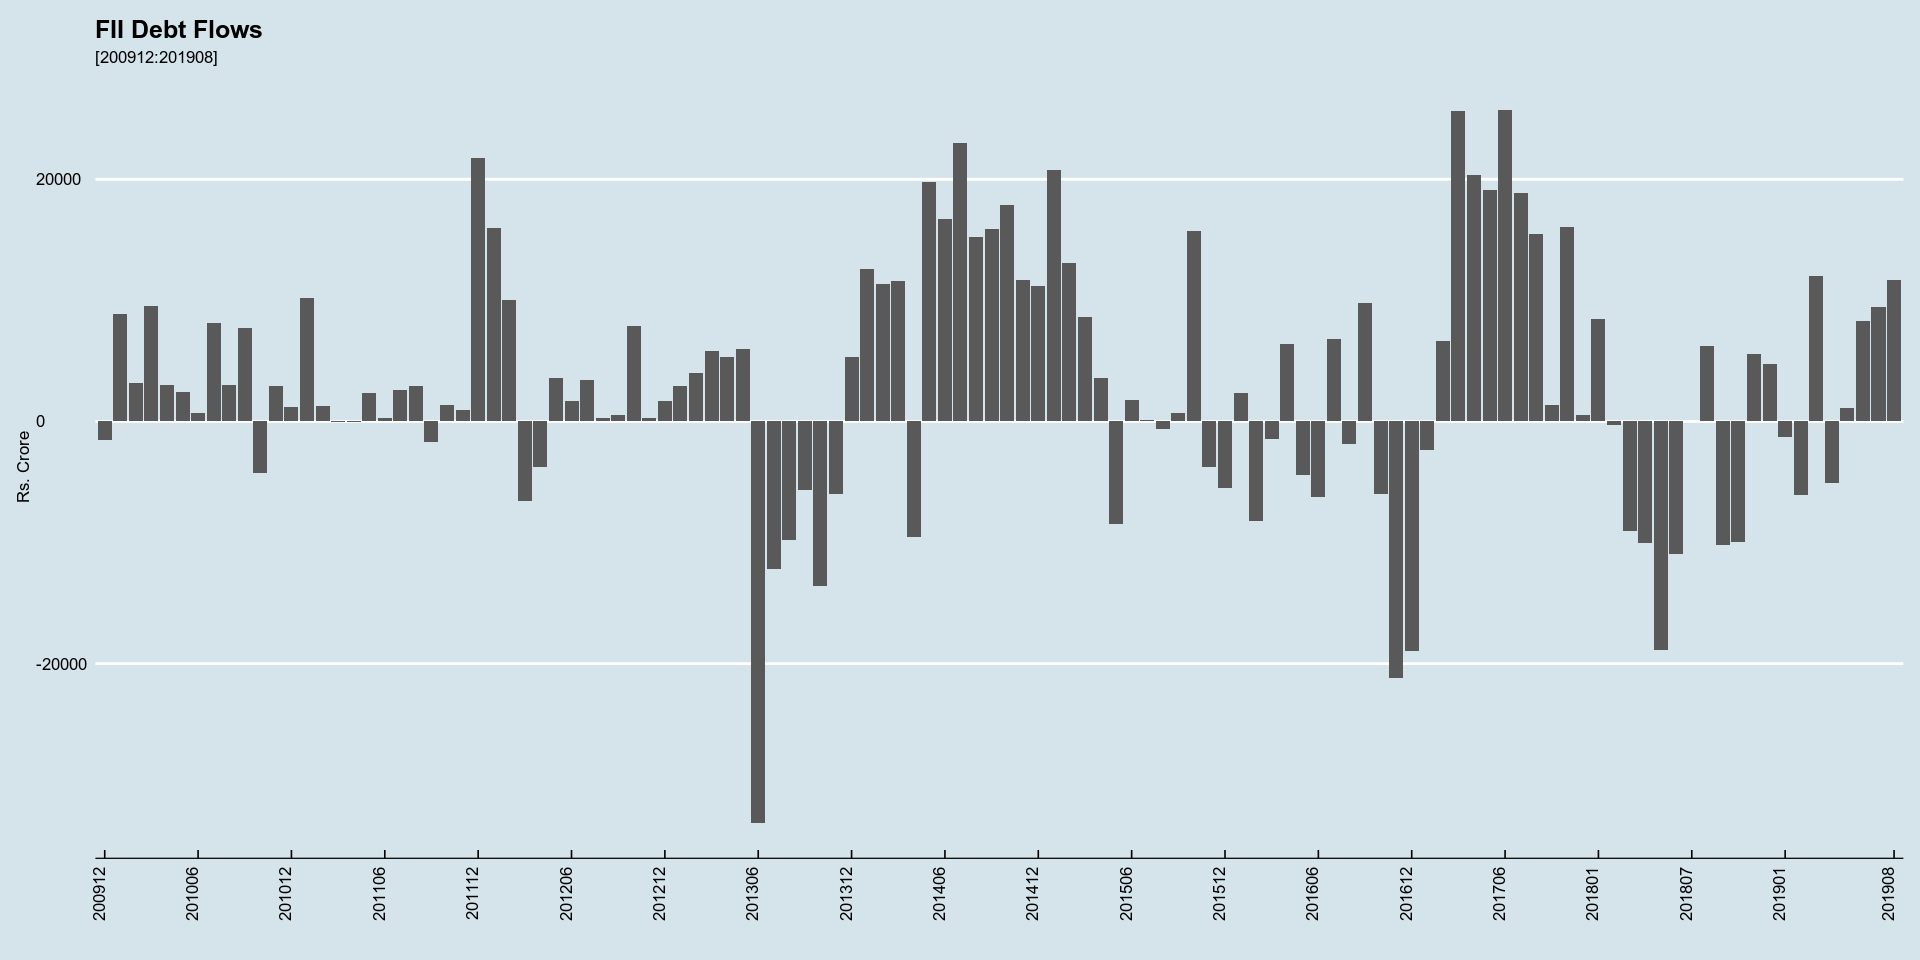

In [4]:
plotFiiFlows(fiiDebt, "FII Debt Flows")
print(summary(fiiDebt$NET))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -28921   -3558    5287    5084   11810   33981 


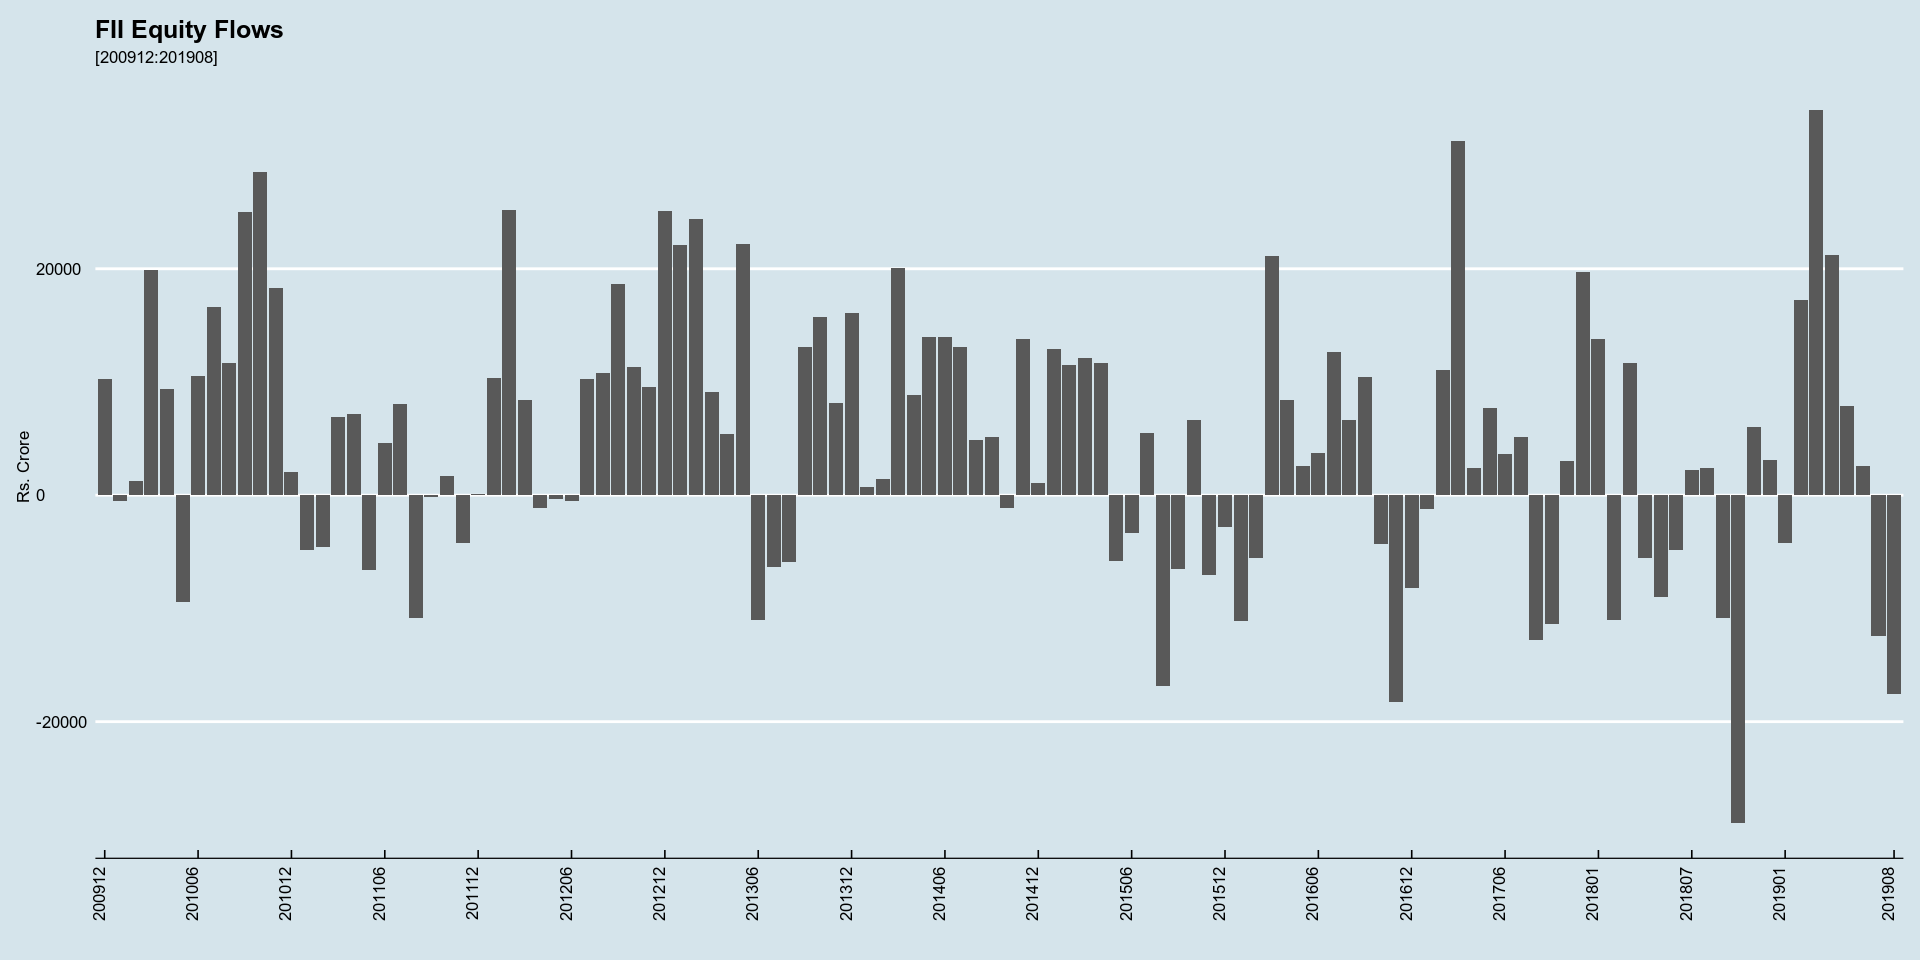

In [5]:
plotFiiFlows(fiiEquity, "FII Equity Flows")
print(summary(fiiEquity$NET))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 -61.650  -12.860    5.155  433.923  196.900 2768.540 


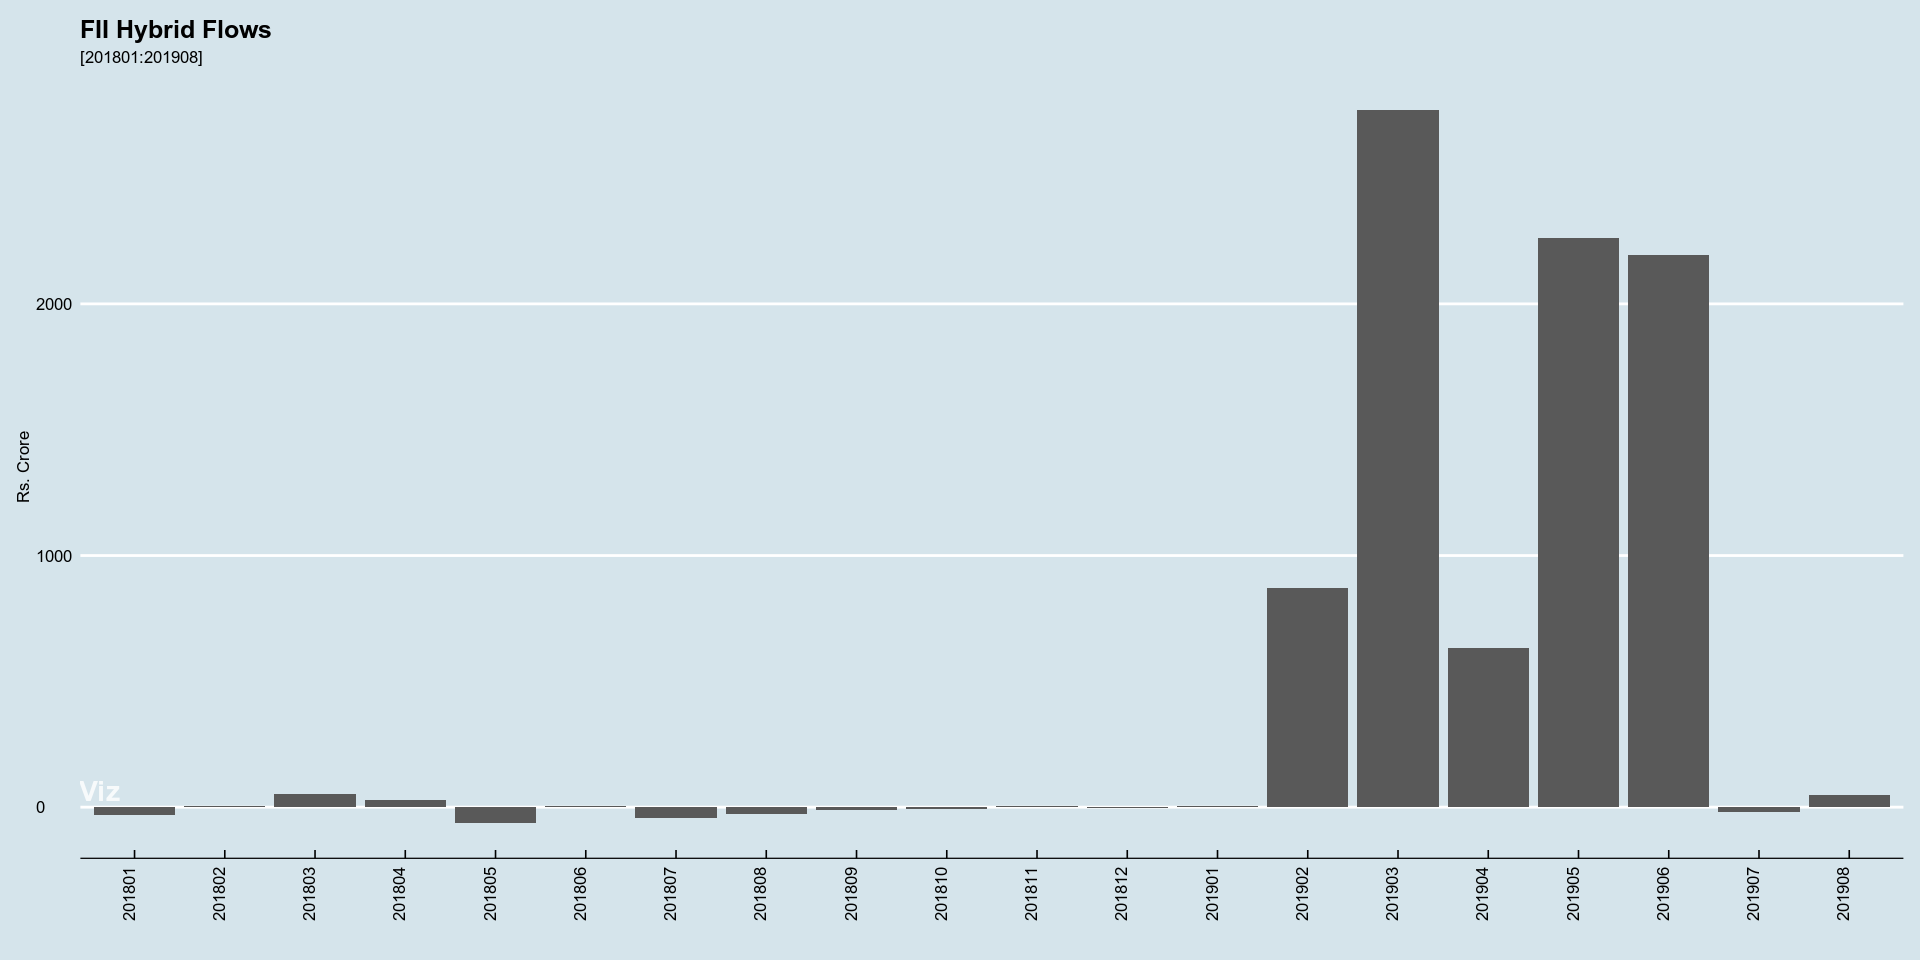

In [6]:
plotFiiFlows(fiiHybrid, "FII Hybrid Flows")
print(summary(fiiHybrid$NET))

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)